In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
population_csv_path = "data\WPP2019_TotalPopulationBySex.csv"
population_df = pd.read_csv(population_csv_path)

In [3]:
population_df.head(10)

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
5,4,Afghanistan,2,Medium,1955,1955.5,4318.945,3952.047,8270.992,12.669
6,4,Afghanistan,2,Medium,1956,1956.5,4375.800,4023.073,8398.873,12.865
7,4,Afghanistan,2,Medium,1957,1957.5,4437.157,4098.000,8535.157,13.073
8,4,Afghanistan,2,Medium,1958,1958.5,4503.156,4176.941,8680.097,13.295
9,4,Afghanistan,2,Medium,1959,1959.5,4573.914,4260.033,8833.947,13.531


In [4]:
# How many LocID do we have ?
len(population_df["LocID"].drop_duplicates().values)

477

In [5]:
# How many location do we have ?
len(population_df["Location"].drop_duplicates().values)

474

**Location is different from countries**. The first task is to keep only countries (193 recongnized by the United Nations)

In [6]:
countries_df = pd.read_json('data/countries.json')

In [7]:
countries_df.head(10)

,id,alpha2,alpha3,name
0,4,af,afg,Afghanistan
1,8,al,alb,Albania
2,12,dz,dza,Algeria
3,20,ad,and,Andorra
4,24,ao,ago,Angola
5,28,ag,atg,Antigua and Barbuda
6,32,ar,arg,Argentina
7,51,am,arm,Armenia
8,36,au,aus,Australia
9,40,at,aut,Austria


In [8]:
# Check if all countries are in the population dataset
countries_id = set(countries_df["id"])
locations_id = set(population_df["LocID"])
countries_id - locations_id

set()

In [9]:
# Filter the dataset with only countries remaining
countries_filter = population_df["LocID"].isin(countries_id)
countries_population_df = population_df[countries_filter]

In [10]:
# Check if the filter works as intended
len(countries_population_df["LocID"].drop_duplicates().values)

193

In [11]:
# Keep only Medium Variant
variant_filter = countries_population_df["Variant"] == "Medium"
countries_population_df = countries_population_df[variant_filter]

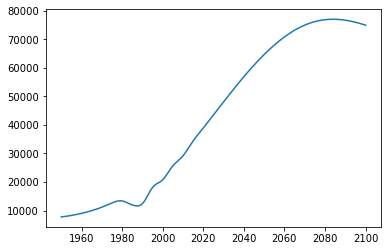

In [12]:
# Vizualise an example with Afghanistan
afghanistan_filter = countries_population_df["Location"] == "Afghanistan"
afghanistan_population = countries_population_df[afghanistan_filter]
plt.plot(afghanistan_population["Time"],afghanistan_population["PopTotal"])

In [13]:
# Agregate all countries to see the world population projection
world_population = countries_population_df.groupby(countries_population_df["Time"]).sum()

In [14]:
world_population.head(10)

,LocID,VarID,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
Time,,,,,,,
1950,83623,386,376446.5,1258822.698,1263033.225,2522034.341,25815.765
1951,83623,386,376639.5,1282589.850,1286452.634,2569222.233,25620.805
1952,83623,386,376832.5,1305987.156,1309438.418,2615607.416,25659.647
1953,83623,386,377025.5,1329358.825,1332350.423,2661893.826,25895.817
1954,83623,386,377218.5,1352987.379,1355482.327,2708657.608,26309.481
1955,83623,386,377411.5,1377093.526,1379061.682,2756346.853,26853.477
1956,83623,386,377604.5,1401833.518,1403247.554,2805276.845,27499.798
1957,83623,386,377797.5,1427302.006,1428132.872,2855634.962,28197.598
1958,83623,386,377990.5,1453538.598,1453752.327,2907495.421,28910.079


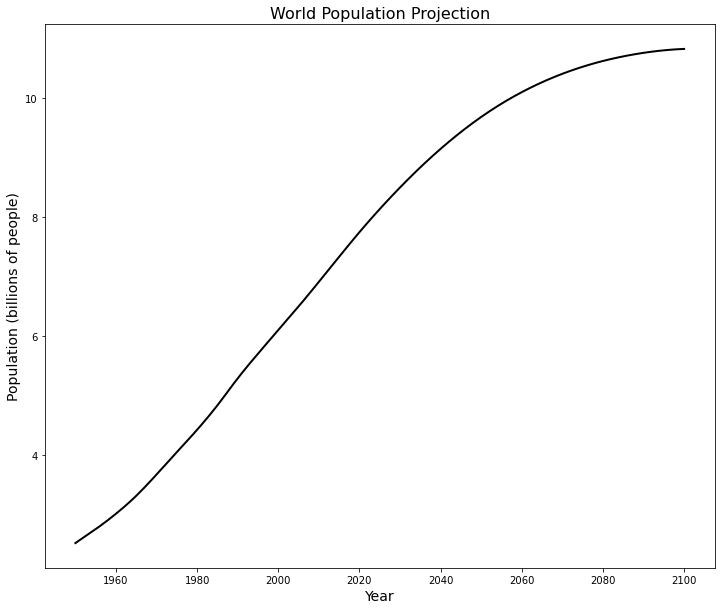

In [15]:
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(world_population.index,world_population["PopTotal"]/1000000,color="black",linewidth=2)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Population (billions of people)',fontsize=14)  # Add a y-label to the axes.
ax.set_title("World Population Projection",fontsize=16)  # Add a title to the axes.
plt.savefig("figures/world_population_projection")